# K nearest neighbors

The k-nearest neighbors algorithm is one of the simplest algorithms for machine learning. It is a non-parametric method used for both classification and regression.

In a classification problem an object is classified by a majority vote of its neighbors. Typically k is a small positive integer. If k = 1, the object is assigned to be the class of the nearest neighbor. If k = 3 the object is assigned to be in the class of the nearest 2 neighbors and so on for different values of k.

In a regression problem, the property of the object is assigned a value that is the average of the values of its k nearest neighbors.

Useful links
* https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm
* http://scikit-learn.org/stable/modules/neighbors.html

The Iris data in the Scikit library illustrates the use of the k-nearest neighbors algorithm for classification.

In [1]:
import sklearn
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn import cross_validation

from IPython.core.display import HTML
#HTML("<style>.container { width:100% !important; }</style>")

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/local/lib/python3.6/dist-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from sklearn import datasets
iris = datasets.load_iris()

The Iris data set has four features (sepal length, sepal width, petal length, petal width) which can be used to classify Iris flowers into three species denoted as "0", "1", "2" (setosa, versicolor, virginica)

In [3]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_names'] = df.species
df.replace({'species_names':{
            0:iris['target_names'][0],
            1:iris['target_names'][1],
            2:iris['target_names'][2]            
        }}, inplace=True)
df.columns = [item.replace(' (cm)', '') for item in df.columns]
df.head()

,sepal length,sepal width,petal length,petal width,species,species_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


The scatter plot shows the three species of Iris in different colors plotted with the sepal length on the x axis and petal width on the y axis

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5,1,'Iris species')

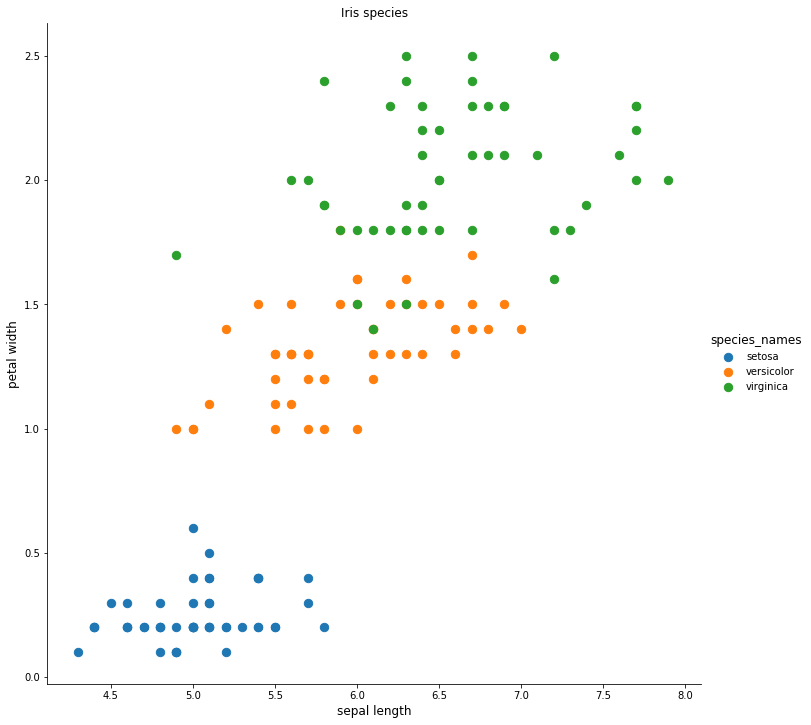

In [4]:
plt.rcParams.update({'axes.labelsize': 'large'})
plt.rcParams.update({'axes.titlesize': 'large'})

g = sns.FacetGrid(df, hue='species_names', size=10)
g.map(plt.scatter, 'sepal length', 'petal width', s=70)
g.add_legend()
g.fig.gca().set_title('Iris species')

The K-nearest neighbors classifier is used to predict the species by using just two features: "sepal length" and "petal width"

In [5]:
from sklearn import neighbors
X = df[['sepal length', 'petal width']].values
y = df.species

The mesh_plot function is used to plot the region for each species predicted by the k-nearest neighbors algorithm.

In [6]:
step = 0.05
    
def mesh_plot(x, y, species, colors, ax, clf):
    values = species.unique()
    xx, yy = np.meshgrid(
        np.arange(x.min() - 0.1, x.max() + 0.1, step),
        np.arange(y.min() - 0.1, y.max() + 0.1, step))
    mesh_predict = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    mesh_predict = mesh_predict.reshape(xx.shape)
    ax.set_xlim(x.min() - 0.2, x.max() + 0.2)
    ax.set_ylim(y.min() - 0.2, y.max() + 0.2)
    ax.scatter(x, y, c=colors)
    ax.pcolormesh(xx, yy, mesh_predict,
        cmap=ListedColormap(sns.color_palette()[:3]), alpha=0.2)

The graphs below show the predictions of the k-nearest neighbors algorithm using three different values for the number of nearest neighbors. 

Text(0.5,1.1,'K-nearest neighbors classifier using different number of neighbors')

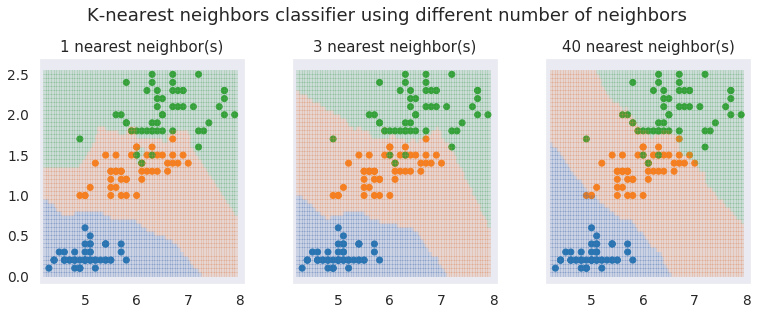

In [7]:
uniqueSpecies = df.species.unique()
colorsMap = dict(zip(uniqueSpecies, sns.color_palette()[:len(uniqueSpecies)]))

sns.set(font_scale=1.25)
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(11, 4), squeeze=True)
fig.tight_layout()

for idx, n_neighbors in enumerate([1, 3, 40]):
    clf = neighbors.KNeighborsClassifier(
        n_neighbors, weights='uniform').fit(X, y)
    colors = [colorsMap[item] for item in y]
    mesh_plot(X[:, 0], X[:, 1], y, colors, ax[idx], clf)
    ax[idx].set_title('{} nearest neighbor(s)'.format(n_neighbors))
title = 'K-nearest neighbors classifier using different number of neighbors'
fig.suptitle(title, y=1.1)

When the k value is small (like the graph on the left) the decision boundary is relatively complex and even though the algorithm predicts the training data well, it is likely overfitting the data and fair poorly on a new sample. For a very high value of k (like the graph on the right) the method the decision boundary is simpler and likely to underfit the training data.